# 0.0. IMPORTS

In [91]:
import pandas as pd   
import inflection
import math
import numpy as np
import seaborn as sns
from IPython.core.display import HTML

## 0.1. Helper Functions

In [92]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading data

In [93]:
#low_memory = False fala pra função read csv ler todo o arquivo de uma vez só para a memoria
df_insurance_raw = pd.read_csv('../Datasets/raw/train.csv',low_memory= False)

# 1.0. DATA DESCRIPTION

In [94]:
df1 = df_insurance_raw.copy()

## 1.1. Rename Columns

In [95]:
df1.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [96]:
cols_old = ['Id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response']

snakecase = lambda x: inflection.underscore(x)
cols_new = list (map(snakecase,cols_old))

#rename
df1.columns = cols_new
df1.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

## 1.2. Data Dimensions

In [97]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 381109
Number of Cols: 12


## 1.3. Data Types

In [98]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

In [99]:
df1.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## 1.4. Check NA

In [100]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## 1.5. Fillout NA

## 1.6. Change Types

In [101]:
df1['id'] = df1['id'].astype('string')
df1['gender'] = df1['gender'].astype('string')
df1['driving_license'] = df1['driving_license'].astype('string')
df1['previously_insured'] = df1['previously_insured'].astype('string')
df1['vehicle_damage'] = df1['vehicle_damage'].astype('string')
df1['policy_sales_channel'] = df1['policy_sales_channel'].astype('int')
df1['policy_sales_channel'] = df1['policy_sales_channel'].astype('string')
df1['region_code'] = df1['region_code'].astype('int')
df1['region_code'] = df1['region_code'].astype('string')
df1['response'] = df1['response'].astype('string')
df1.dtypes

id                      string[python]
gender                  string[python]
age                              int64
driving_license         string[python]
region_code             string[python]
previously_insured      string[python]
vehicle_age                     object
vehicle_damage          string[python]
annual_premium                 float64
policy_sales_channel    string[python]
vintage                          int64
response                string[python]
dtype: object

### 1.6. Mapping Values

In [102]:
#df1['vehicle_damage'] = df1['vehicle_damage'].map({'Yes': '1', 'No': '0'})
#df1['vehicle_damage'] = df1['vehicle_damage'].astype('string')

In [103]:
df1['vehicle_age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [104]:
#df1['vehicle_age'] = df1['vehicle_age'].map({'< 1 Year': '0', '1-2 Year': '1','> 2 Years': '2'})
#df1['vehicle_age'] = df1['vehicle_age'].astype('string')

## 1.7. Descriptive Statistical

In [105]:
df1.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454.0,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536.0,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294.0,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619.0,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496.0,152,39,0


In [106]:
num_attributes = df1.select_dtypes(include = ['int64','float64'])
cat_attributes = df1.select_dtypes(exclude = ['int64','float64','datetime64[ns]'])

### 1.7.1 Numerical Attributes

In [107]:
#Central Tendency - mean, median

ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#concatenate
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attribute','min','max','range','mean','median','std','skew','kurtosis']
m

,attribute,min,max,range,mean,median,std,skew,kurtosis
0,age,20.0,85.0,65.0,38.822584,36.0,15.511591,0.672539,-0.565655
1,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087,34.004569
2,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,0.003030,-1.200688


In [108]:
cat_attributes.head()

,id,gender,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,policy_sales_channel,response
0,1,Male,1,28,0,> 2 Years,Yes,26,1
1,2,Male,1,3,0,1-2 Year,No,26,0
2,3,Male,1,28,0,> 2 Years,Yes,26,1
3,4,Male,1,11,1,< 1 Year,No,152,0
4,5,Female,1,41,1,< 1 Year,No,152,0


### 1.7.2 Categorical Attributes

In [109]:
cat_attributes.apply(lambda x: x.unique().shape[0])

id                      381109
gender                       2
driving_license              2
region_code                 53
previously_insured           2
vehicle_age                  3
vehicle_damage               2
policy_sales_channel       155
response                     2
dtype: int64

In [110]:
cat_attributes.describe()

,id,gender,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,policy_sales_channel,response
count,381109,381109,381109,381109,381109,381109,381109,381109,381109
unique,381109,2,2,53,2,3,2,155,2
top,1,Male,1,28,0,1-2 Year,Yes,152,0
freq,1,206089,380297,106415,206481,200316,192413,134784,334399


<Axes: xlabel='age', ylabel='response'>

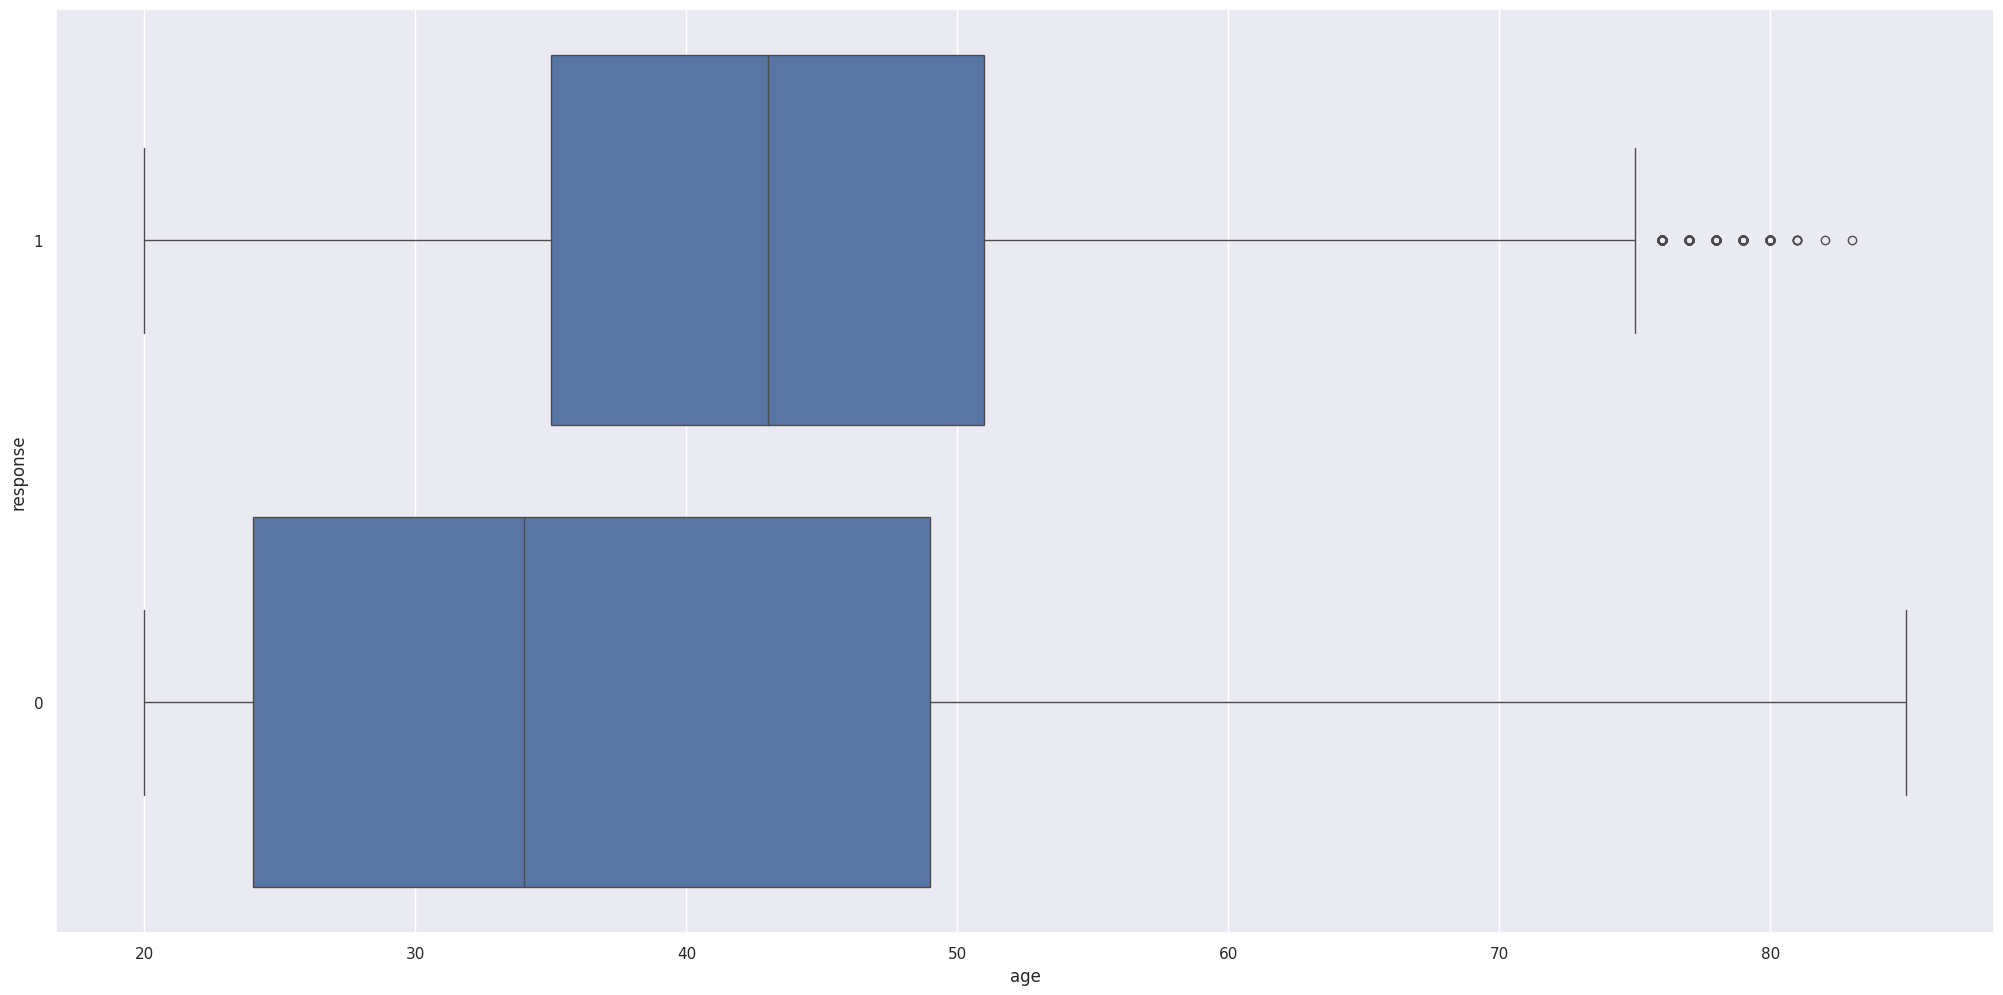

In [111]:
sns.boxplot(x='age', y='response',data=df1)

In [112]:
aux1= df1[df1['response']=='1']

<Axes: xlabel='age', ylabel='Count'>

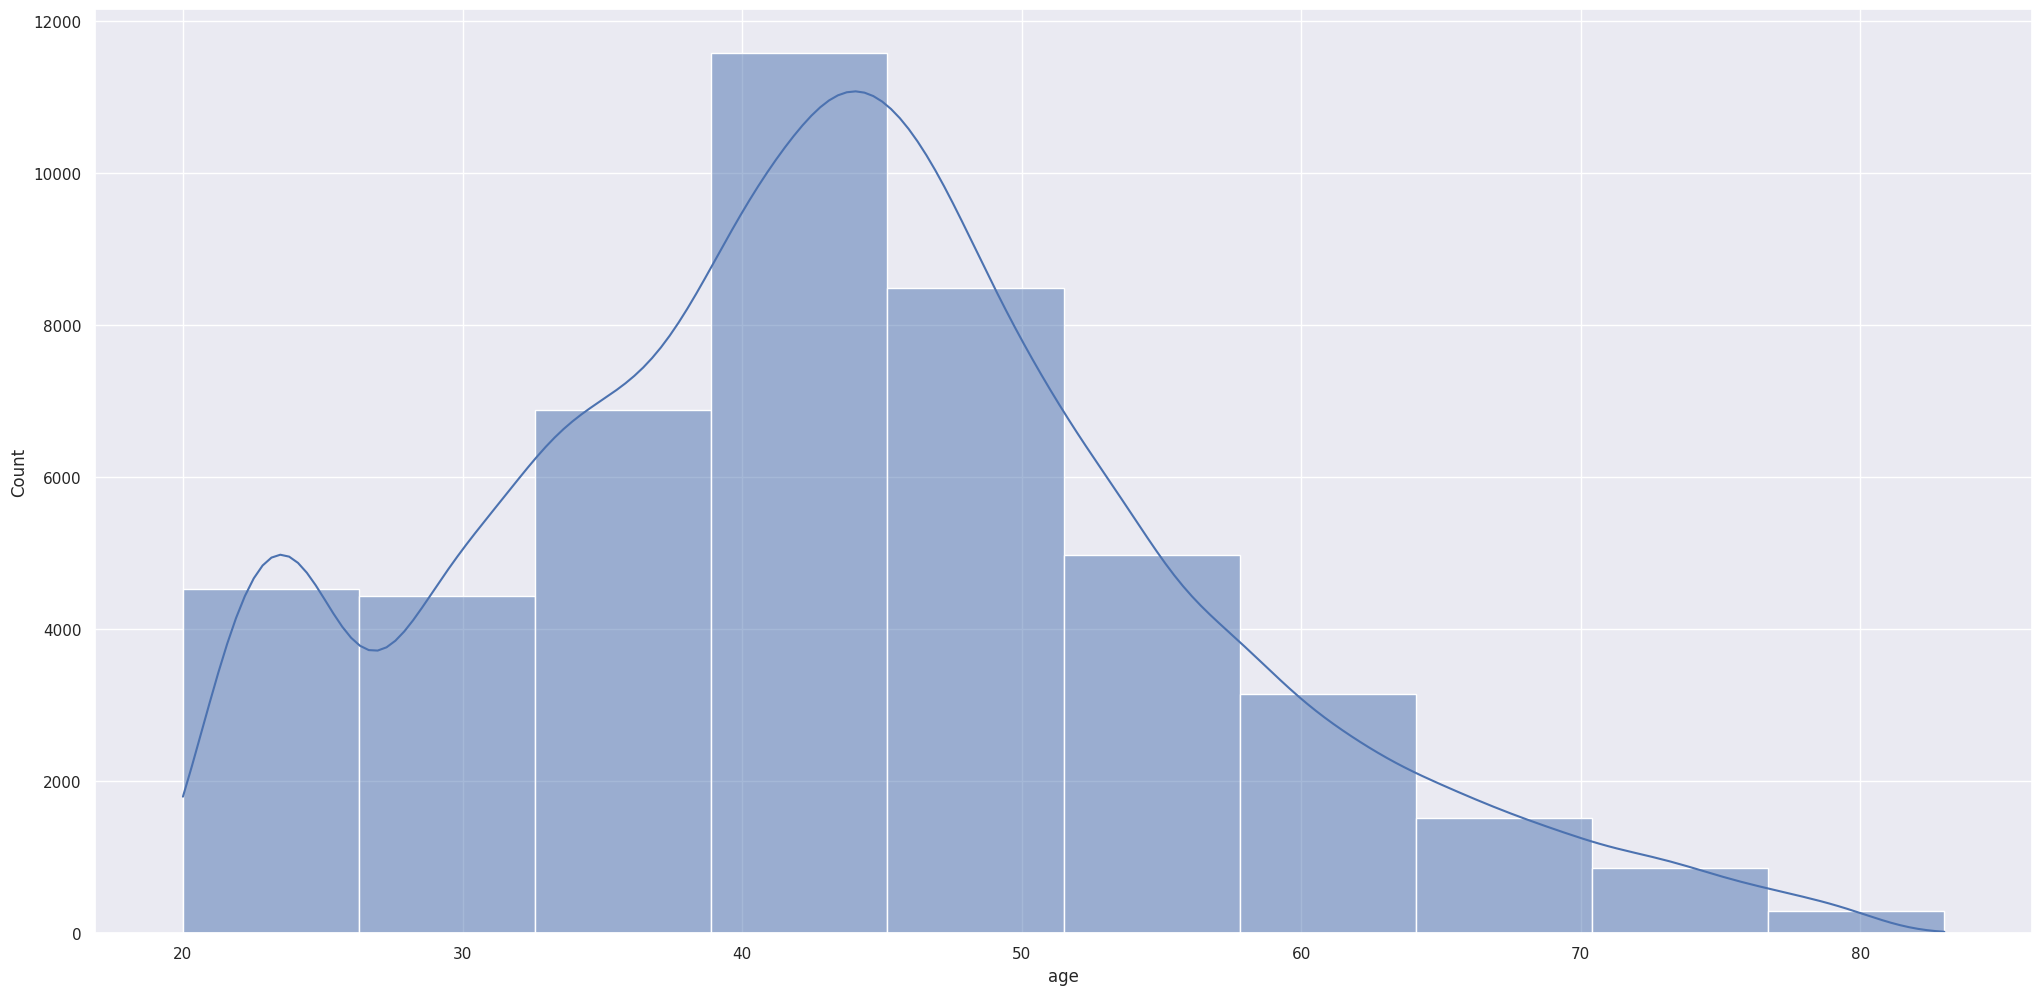

In [113]:
sns.histplot(data = aux1, x = "age", kde = True,bins=10)

/tmp/ipykernel_6458/3795873991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df1, y = 'gender', palette='colorblind',orient='y',ax = axs[0, 0]);
/tmp/ipykernel_6458/3795873991.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df1, y = 'driving_license', palette='colorblind',orient='y',ax = axs[0, 1]);
/tmp/ipykernel_6458/3795873991.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df1, y = 'vehicle_age', palette='colorblind',orient='y',ax = axs[1, 0]);
/tmp/ipykernel_6458/3795873991.py:19:

[Text(0, 0, '87.7%')]

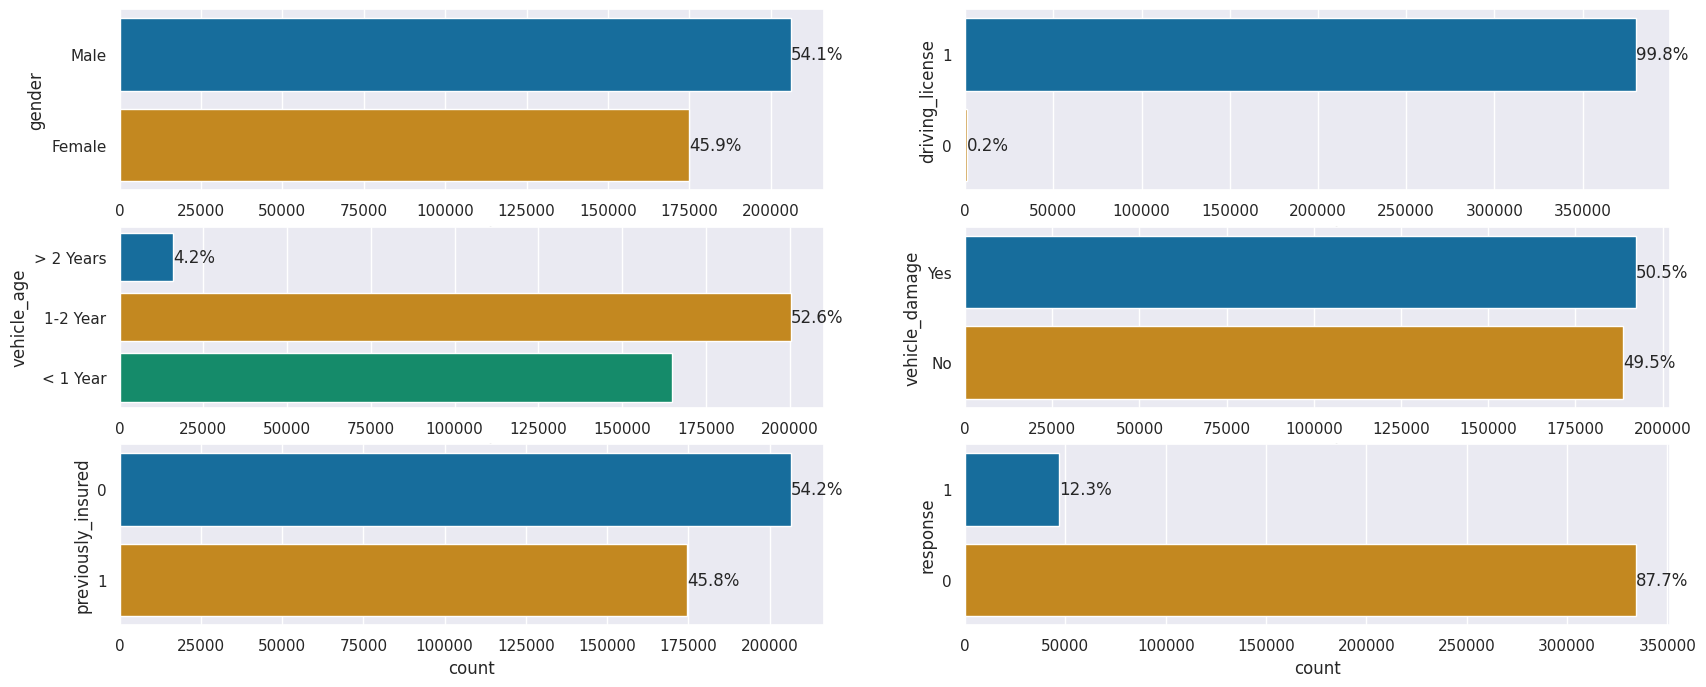

In [114]:
fig, axs = plt.subplots(3, 2, figsize = (20, 8))
#------------axs[0, 0]-----------------------------------------------------------------------------------------
ax = sns.countplot(data = df1, y = 'gender', palette='colorblind',orient='y',ax = axs[0, 0]);
total = df1['response'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
ax.bar_label(ax.containers[1], fmt=lambda x: f'{(x/total)*100:0.1f}%')
#------------axs[0, 1]-----------------------------------------------------------------------------------------

ax = sns.countplot(data = df1, y = 'driving_license', palette='colorblind',orient='y',ax = axs[0, 1]);
total = df1['response'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
ax.bar_label(ax.containers[1], fmt=lambda x: f'{(x/total)*100:0.1f}%')
#------------axs[1, 0]-----------------------------------------------------------------------------------------
ax = sns.countplot(data = df1, y = 'vehicle_age', palette='colorblind',orient='y',ax = axs[1, 0]);
total = df1['response'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
ax.bar_label(ax.containers[1], fmt=lambda x: f'{(x/total)*100:0.1f}%')
#------------axs[1, 1]-----------------------------------------------------------------------------------------
ax = sns.countplot(data = df1, y = 'vehicle_damage', palette='colorblind',orient='y',ax = axs[1, 1]);
total = df1['response'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
ax.bar_label(ax.containers[1], fmt=lambda x: f'{(x/total)*100:0.1f}%')
#------------axs[2, 0]-----------------------------------------------------------------------------------------
ax = sns.countplot(data = df1, y = 'previously_insured', palette='colorblind',orient='y',ax = axs[2, 0]);
total = df1['response'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
ax.bar_label(ax.containers[1], fmt=lambda x: f'{(x/total)*100:0.1f}%')
#------------axs[2, 1]-----------------------------------------------------------------------------------------
ax = sns.countplot(data = df1, y = 'response', palette='colorblind',orient='y',ax = axs[2, 1]);
total = df1['response'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
ax.bar_label(ax.containers[1], fmt=lambda x: f'{(x/total)*100:0.1f}%')